In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin


# Load in Each of the Datasets

In [26]:
# Define column names based on dataset documentation
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", 
                "restecg", "thalach", "exang", "oldpeak", "slope", 
                "ca", "thal", "target"]

# Read the .data file with specified column names
df0 = pd.read_csv("data/processed.cleveland.data", names=column_names, header=None, na_values="?")
df1 = pd.read_csv("data/processed.hungarian.data", names=column_names, header=None, na_values="?")
df2 = pd.read_csv("data/processed.switzerland.data", names=column_names, header=None, na_values="?")
df3 = pd.read_csv("data/processed.va.data", names=column_names, header=None, na_values="?")

dfs = [df0, df1, df2, df3]

In [27]:
import pandas as pd

dfs = [df0, df1, df2, df3]
df_combined = pd.concat(dfs, ignore_index=True)  # ignore_index resets the index

In [28]:
df_combined

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54.0,0.0,4.0,127.0,333.0,1.0,1.0,154.0,0.0,0.0,NaN,NaN,NaN,1
916,62.0,1.0,1.0,NaN,139.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55.0,1.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,NaN,NaN,6.0,2
918,58.0,1.0,4.0,NaN,385.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
for df in dfs:
    print("Data shape:", df.shape)

Data shape: (303, 14)
Data shape: (294, 14)
Data shape: (123, 14)
Data shape: (200, 14)


In [7]:
df_combined.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


# Evaluate for missing data
Either drop columns with >10% missing data, or fill appropriately with mean or median

In [8]:
for column in df_combined.columns:
    n_nulls = df_combined[column].isnull().sum()
    if n_nulls != 0:
        print(f"Column {column} has {n_nulls} null values")

missing_percent = df_combined.isnull().sum() / len(df_combined) * 100
print(missing_percent) 

Column trestbps has 59 null values
Column chol has 30 null values
Column fbs has 90 null values
Column restecg has 2 null values
Column thalach has 55 null values
Column exang has 55 null values
Column oldpeak has 62 null values
Column slope has 309 null values
Column ca has 611 null values
Column thal has 486 null values
age          0.000000
sex          0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalach      5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
target       0.000000
dtype: float64


In [9]:
df_combined = df_combined.drop(columns=['ca', 'thal', 'slope'])  # Drop high-null columns

# Fill missing values properly
df_combined['trestbps'] = df_combined['trestbps'].fillna(df_combined['trestbps'].median())
df_combined['chol'] = df_combined['chol'].fillna(df_combined['chol'].median())
df_combined['fbs'] = df_combined['fbs'].fillna(df_combined['fbs'].mode()[0])
df_combined['restecg'] = df_combined['restecg'].fillna(df_combined['restecg'].mode()[0])
df_combined['thalach'] = df_combined['thalach'].fillna(df_combined['thalach'].median())
df_combined['exang'] = df_combined['exang'].fillna(df_combined['exang'].mode()[0])
df_combined['oldpeak'] = df_combined['oldpeak'].fillna(df_combined['oldpeak'].median())

df_combined.to_csv("cleaned_heart_disease.csv", index=False)


In [10]:
for df in dfs:
    for column in df.columns:
        n_nulls = df[column].isnull().sum()
        if n_nulls != 0:
            print(f"Column {column} has {n_nulls} null values")

    missing_percent = df.isnull().sum() / len(df) * 100
    print(missing_percent)   

Column ca has 4 null values
Column thal has 2 null values
age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          1.320132
thal        0.660066
target      0.000000
dtype: float64
Column trestbps has 1 null values
Column chol has 23 null values
Column fbs has 8 null values
Column restecg has 1 null values
Column thalach has 1 null values
Column exang has 1 null values
Column slope has 190 null values
Column ca has 291 null values
Column thal has 266 null values
age          0.000000
sex          0.000000
cp           0.000000
trestbps     0.340136
chol         7.823129
fbs          2.721088
restecg      0.340136
thalach      0.340136
exang        0.340136
oldpeak      0.000000
slope       64.625850
ca          98.979592
thal        90.476190
target       0.000000
dtype: float64
Column trestbps has 2 nu

In [11]:
df_combined

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0
...,...,...,...,...,...,...,...,...,...,...,...
915,54.0,0.0,4.0,127.0,333.0,1.0,1.0,154.0,0.0,0.0,1
916,62.0,1.0,1.0,130.0,139.0,0.0,1.0,140.0,0.0,0.5,0
917,55.0,1.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,2
918,58.0,1.0,4.0,130.0,385.0,1.0,2.0,140.0,0.0,0.5,0


In [12]:
# Handling missing values
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang']

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Encoding categorical variables
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
label_encoder = LabelEncoder()

# Scaling numerical features
scaler = StandardScaler()

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num_impute', num_imputer, num_cols),
    ('cat_impute', cat_imputer, cat_cols),
    ('num_scale', scaler, num_cols),
    ('cat_encode', one_hot_encoder, cat_cols)
])

X = df_combined.drop(columns=['target'])
y = df_combined['target']
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Applying transformations
X_train = preprocessor.fit_transform(X_train1)
X_test = preprocessor.transform(X_test)

# Print shape to confirm
print(f'Training set shape: {X_train.shape}, Test set shape: {X_test.shape}')

Training set shape: (736, 28), Test set shape: (184, 28)


# EDA Methods
View distribution of features

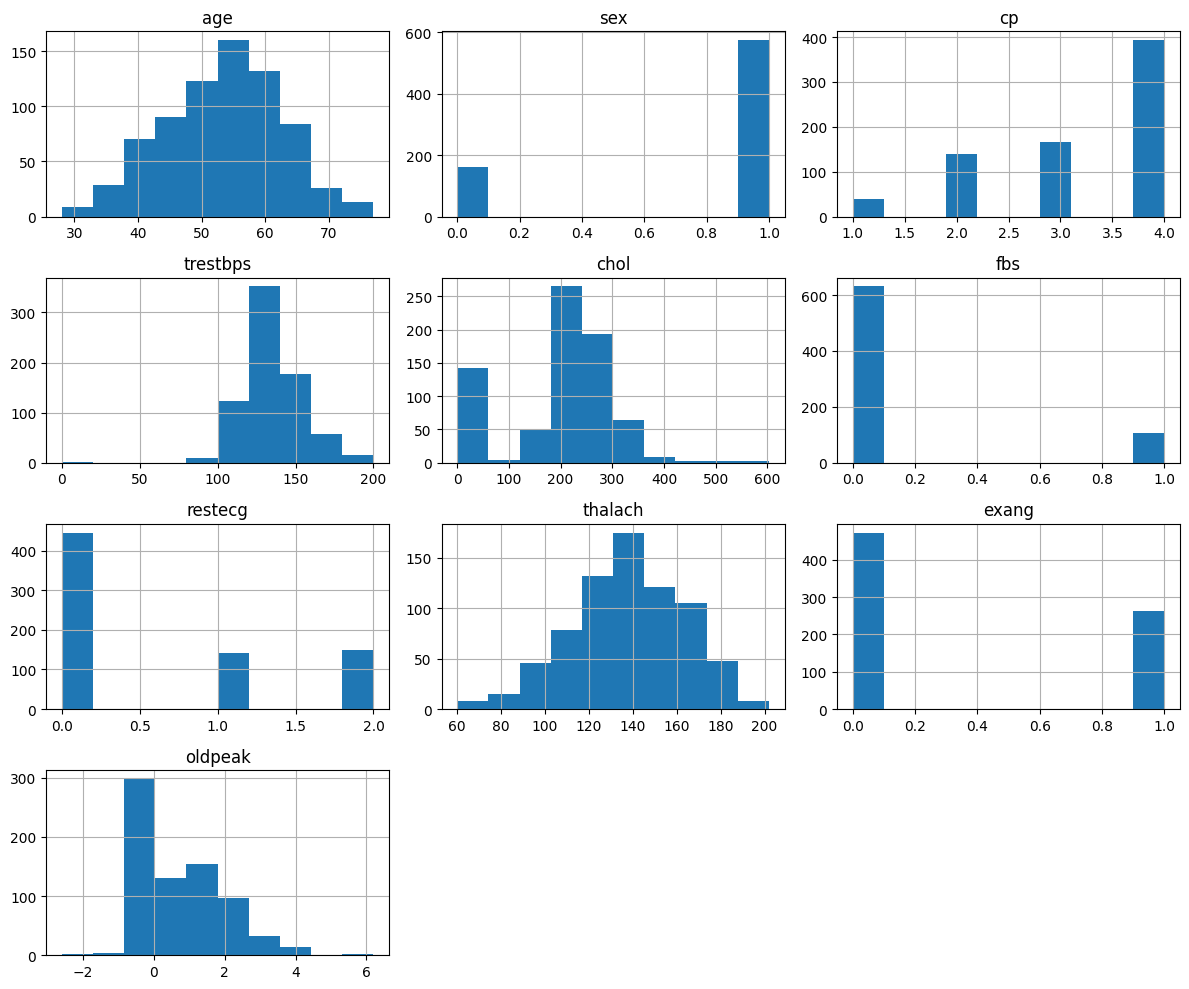

In [13]:
#Histogram
X_train1.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

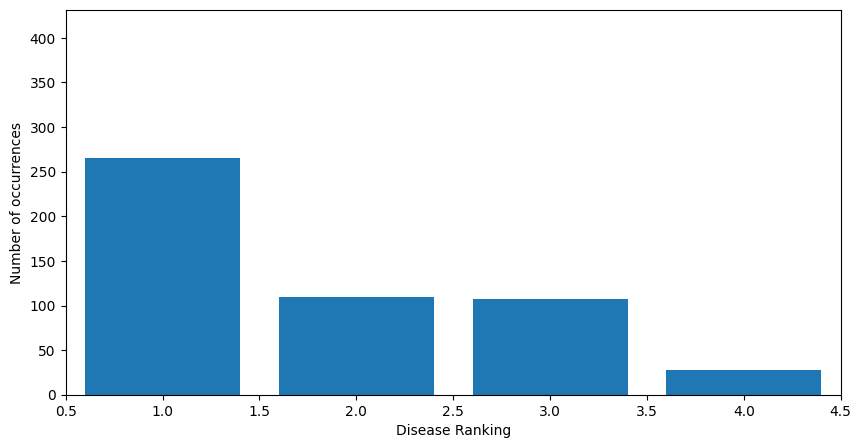

In [14]:
label_dist = df_combined["target"].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(label_dist.index, label_dist.values, width = 0.8)
plt.xlabel("Disease Ranking")
plt.ylabel("Number of occurrences")
#plt.xticks(rotation=90)
plt.xlim(0.5, len(label_dist) - 0.5)
plt.show()

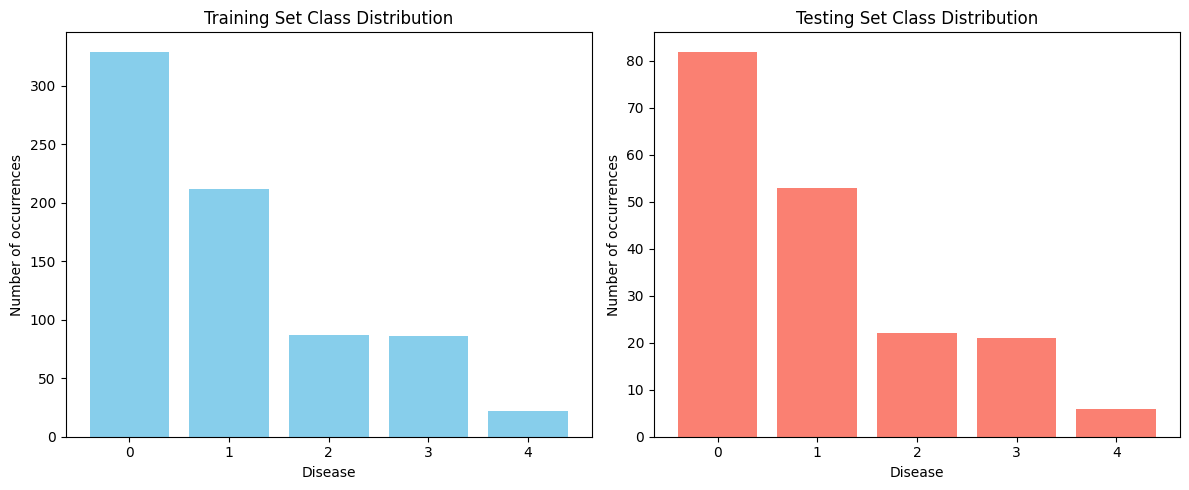

In [15]:
import matplotlib.pyplot as plt

# Get label distributions for training and testing sets
train_dist = y_train.value_counts()
test_dist = y_test.value_counts()

# Create side-by-side bar charts for comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Training set distribution
axes[0].bar(train_dist.index, train_dist.values, width=0.8, color="skyblue")
axes[0].set_title("Training Set Class Distribution")
axes[0].set_xlabel("Disease")
axes[0].set_ylabel("Number of occurrences")
axes[0].set_xticks(train_dist.index)

# Testing set distribution
axes[1].bar(test_dist.index, test_dist.values, width=0.8, color="salmon")
axes[1].set_title("Testing Set Class Distribution")
axes[1].set_xlabel("Disease")
axes[1].set_ylabel("Number of occurrences")
axes[1].set_xticks(test_dist.index)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


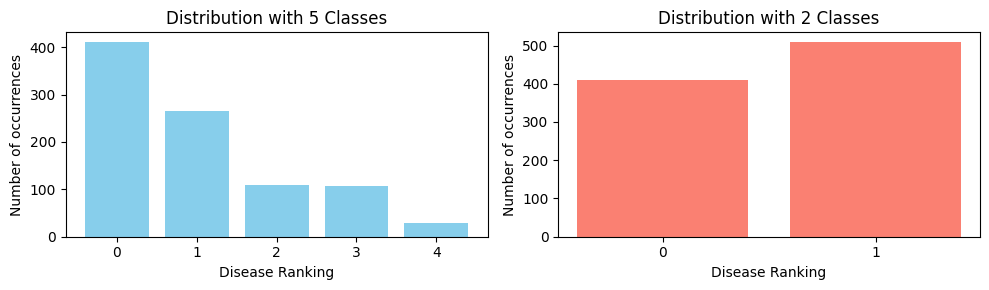

In [29]:
import matplotlib.pyplot as plt

# Get label distributions for training and testing sets
before_dist = df_combined['target'].value_counts()
df_new = df_combined.copy()
df_new['target'] = df_new['target'].apply(lambda x: 1 if x > 0 else 0)
after_dist = df_new['target'].value_counts()

# Create side-by-side bar charts for comparison
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Training set distribution
axes[0].bar(before_dist.index, before_dist.values, width=0.8, color="skyblue")
axes[0].set_title("Distribution with 5 Classes")
axes[0].set_xlabel("Disease Ranking")
axes[0].set_ylabel("Number of occurrences")
axes[0].set_xticks(before_dist.index)

# Testing set distribution
axes[1].bar(after_dist.index, after_dist.values, width=0.8, color="salmon")
axes[1].set_title("Distribution with 2 Classes")
axes[1].set_xlabel("Disease Ranking")
axes[1].set_ylabel("Number of occurrences")
axes[1].set_xticks(after_dist.index)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


https://www.statology.org/tetrachoric-correlation/

In [17]:
df_combined.shape

(920, 11)

# Correlation between features
May reveal which ones to drop

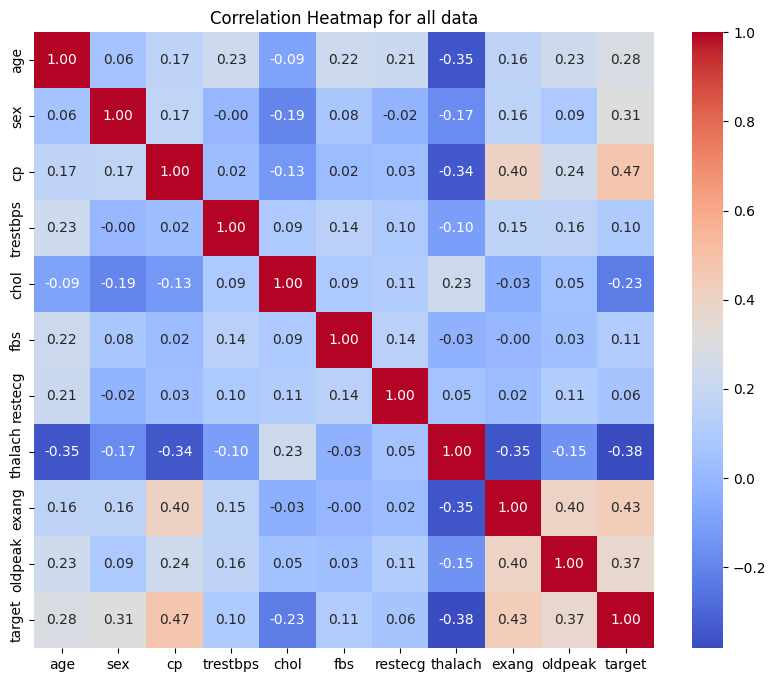

In [18]:
# Filter data for severity level 0

# Calculate and plot the correlation matrix for severity level 0
plt.figure(figsize=(10, 8))
sns.heatmap(df_combined.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for all data')
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

Accuracy: 0.5760869565217391
[[67 13  2  0  0]
 [11 33  3  6  0]
 [ 4  8  3  7  0]
 [ 3 13  3  2  0]
 [ 0  2  1  2  1]]


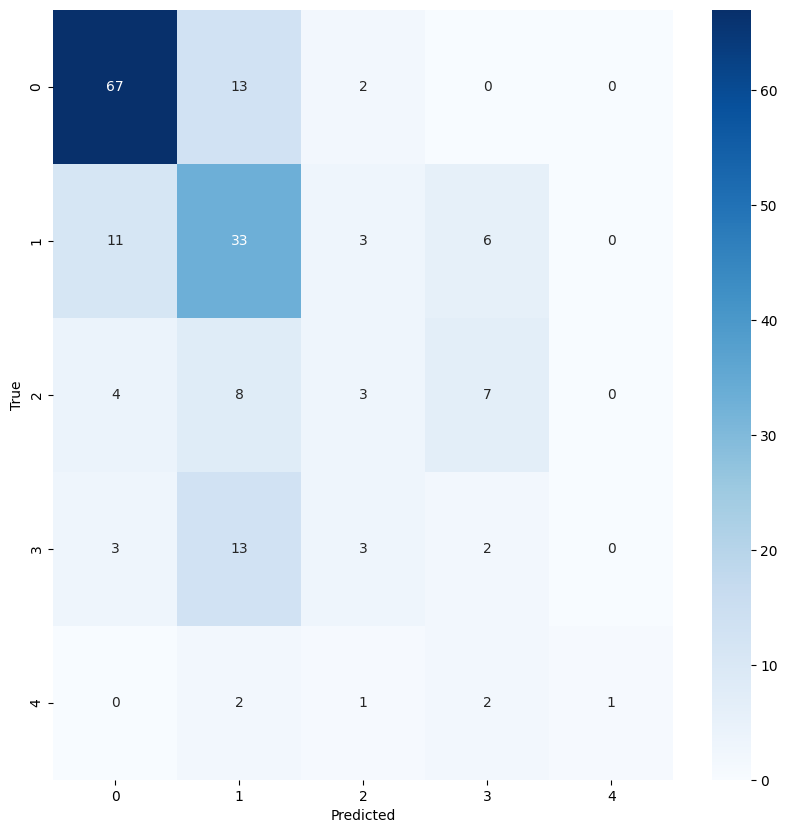

In [21]:
plt.figure(figsize=(10, 10))
sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

# CPU specs

In [23]:
import psutil

# CPU Information
cpu_cores = psutil.cpu_count(logical=False)  # Physical cores
cpu_threads = psutil.cpu_count(logical=True)  # Logical threads
cpu_freq = psutil.cpu_freq()  # CPU frequency

print(f"Physical cores: {cpu_cores}")
print(f"Logical threads: {cpu_threads}")
print(f"CPU Frequency: {cpu_freq.current} MHz")


Physical cores: 4
Logical threads: 8
CPU Frequency: 991.0 MHz
